# **CEBRA Tutorial for Affective Neuroscience**
written by   
**Jinwoo Lee**   
SNU Connectome Lab   
adem1997@snu.ac.kr | https://jinwoo-lee.com   
_     
Dec, 2024  
Invited Lecture    
*Data Science for Human Neuroimaging*   
Dept. Psychology, Seoul National University



# **I. Environmental Setting**

In [ ]:
# set the working directory (put your own directory path!)
import os
os.chdir("_________________")

/content/drive/MyDrive/connectome/CEBRA_tutorial


In [ ]:
# install pingouin package to calculate statistics
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 16.1 MB/s eta 0:00:00


In [ ]:
# install CEBRA package for model fitting
!pip install cebra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.2/202.2 kB 9.6 MB/s eta 0:00:00


In [ ]:
# import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from scipy.stats import ttest_rel
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
from pingouin import compute_effsize

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import locale
import cebra

# **II. Data Exploration**

In [ ]:
sub_list = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06']

#### **II-1. overview of data structure**

In [ ]:
sample_data = pd.read_csv('dataset/sub-01_SP-STFT-input.csv')
sample_data.head()

,delta_P7,delta_P4,delta_Cz,delta_Pz,delta_P3,delta_P8,delta_O1,delta_O2,delta_FC6,delta_F8,...,gamma_C4,gamma_F4,gamma_AF4,gamma_Fz,gamma_C3,gamma_F3,gamma_AF3,gamma_FC5,gamma_F7,mode
0,18.960091,15.439935,9.884708,2.018787,9.305036,31.025013,6.199192,6.625066,12.782798,12.622869,...,2.396298,2.365462,2.120854,2.497508,2.257526,3.191740,2.597074,2.416754,2.380625,0
1,13.040974,8.931705,8.704452,8.822786,12.831371,13.413815,20.104806,8.445982,14.129754,6.549954,...,3.336546,3.677013,12.690851,3.074152,3.754887,4.729782,2.702067,3.661106,3.063639,0
2,23.129206,21.517155,38.352784,28.719422,20.742017,36.620262,22.669731,17.058347,4.270997,7.787783,...,4.165948,4.159270,9.609141,4.274455,3.454419,4.520762,4.470126,5.062811,4.242154,0
3,29.614488,17.169622,36.573640,18.623590,20.168234,51.993859,35.961409,12.478503,27.583847,26.922861,...,3.955036,3.613605,3.695349,3.753241,3.732774,4.650151,4.806672,5.040090,4.350966,0
4,185.537524,98.534377,120.254598,144.060106,198.550739,98.520491,203.620709,104.613157,21.626230,10.356699,...,4.801387,4.496527,6.928200,5.847904,5.566394,7.497866,7.898739,5.618736,5.890272,0


#### **II-2. all subjects' data structure**

In [ ]:
# the number of timepoints
print("========== TIMEPOINT CHECK ==========")
for sub in sub_list:
  tmp_df = pd.read_csv(f"./dataset/{sub}_SP-STFT-input.csv")

  print(f"{sub} | # of timepoints: ", tmp_df.shape[0])

print("\n")

# the number of columns
print("========== COLUMNS CHECK ==========")

for sub in sub_list:
  tmp_df = pd.read_csv(f"./dataset/{sub}_SP-STFT-input.csv")

  print(f"{sub} | # of columns: ", tmp_df.shape[1])

print("\n")

# the column names
print("========== COLUMN NAMES CHECK ==========")

for sub in sub_list:
  tmp_df = pd.read_csv(f"./dataset/{sub}_SP-STFT-input.csv")

  print(f"{sub} | column names: ", tmp_df.columns.tolist())

========== TIMEPOINT CHECK ==========
sub-01 | # of timepoints:  233
sub-02 | # of timepoints:  233
sub-03 | # of timepoints:  233
sub-04 | # of timepoints:  233
sub-05 | # of timepoints:  233
sub-06 | # of timepoints:  233


========== COLUMNS CHECK ==========
sub-01 | # of columns:  96
sub-02 | # of columns:  96
sub-03 | # of columns:  96
sub-04 | # of columns:  96
sub-05 | # of columns:  96
sub-06 | # of columns:  96


========== COLUMN NAMES CHECK ==========
sub-01 | column names:  ['delta_P7', 'delta_P4', 'delta_Cz', 'delta_Pz', 'delta_P3', 'delta_P8', 'delta_O1', 'delta_O2', 'delta_FC6', 'delta_F8', 'delta_C4', 'delta_F4', 'delta_AF4', 'delta_Fz', 'delta_C3', 'delta_F3', 'delta_AF3', 'delta_FC5', 'delta_F7', 'theta_P7', 'theta_P4', 'theta_Cz', 'theta_Pz', 'theta_P3', 'theta_P8', 'theta_O1', 'theta_O2', 'theta_FC6', 'theta_F8', 'theta_C4', 'theta_F4', 'theta_AF4', 'theta_Fz', 'theta_C3', 'theta_F3', 'theta_AF3', 'theta_FC5', 'theta_F7', 'alpha_P7', 'alpha_P4', 'alpha_Cz', 'alpha_P

#### **II-3. Are EEG signals really non-gaussian?**

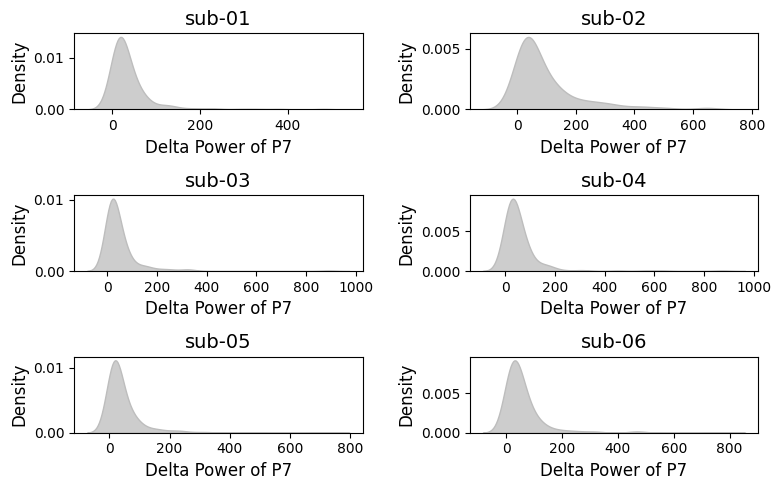

In [ ]:
# set the 3*2 subplot templates
fig, axes = plt.subplots(3, 2, figsize=(8, 5))
axes = axes.flatten()

for idx, sub in enumerate(sub_list):
    # iterative data loading
    tmp_df = pd.read_csv(f"./dataset/{sub}_SP-STFT-input.csv")

    # extract the first EEG feature (i.e., delta power of P7)
    first_col = tmp_df.iloc[:, 0]

    # draw the density distribution plot
    sns.kdeplot(first_col, fill = True, color = "#BDBDBD", alpha = 0.75, ax = axes[idx])
    axes[idx].set_title(sub, fontsize=14)
    axes[idx].set_xlabel("Delta Power of P7", fontsize=12)
    axes[idx].set_ylabel("Density", fontsize=12)

# print the subplots
plt.tight_layout()
plt.show()

#### **II-4. temporal dynamics of valence**

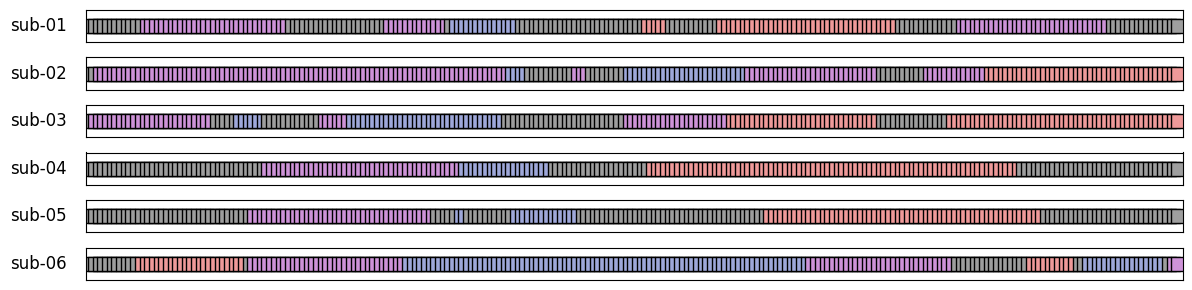

In [ ]:
# set the subplot templates
fig, axes = plt.subplots(len(sub_list), 1, figsize=(12, 3))
if len(sub_list) == 1:
    axes = [axes]

for idx, sub in enumerate(sub_list):
    # iterative data loading
    tmp_df = pd.read_csv(f"./dataset/{sub}_SP-STFT-input.csv")

    # extract the valence sequence
    last_col = tmp_df.iloc[:, -1]

    # define the color map | 0: neutral (gray), 1: positive (red), 2: mixed (violet), 3: negative (blue)
    color_map = {0: '#9E9E9E', 1: '#EF9A9A', 2: '#CE93D8', 3: '#9FA8DA'}
    colors = [color_map[label] for label in last_col]

    # load the timepoints
    x = range(len(last_col))

    # visualize valence dynamics as a color bar
    axes[idx].scatter(x, [0] * len(x), c=colors, s=100, edgecolor='k', marker='s')

    # subject number
    axes[idx].text(-5, 0, sub, fontsize=12, ha='right', va='center')

    # set the details
    axes[idx].set_xlim(-1, len(last_col))
    axes[idx].set_yticks([])                # no y-axis
    axes[idx].set_xticks([])                # no x-axis
    axes[idx].set_xticklabels([])

# print the subplots
plt.tight_layout()
plt.show()

# **III. CEBRA Training**

#### **III-1. Preview of CEBRA fitting**

##### **III-1-(a). data preparation**

In [ ]:
# disentangle EEG and valence sequences from the sample data
# NOTE: CEBRA receives numpy array as a input
sample_eeg = sample_data.iloc[:, :-1].to_numpy()
sample_val = sample_data.iloc[:, -1].to_numpy()

print(f"(time, EEG feature) = {sample_eeg.shape}")
print(f"(time, valence seq) = {sample_val.shape}")

(time, EEG feature) = (233, 95)
(time, valence seq) = (233,)


##### **III-1-(b). model fitting**

In [ ]:
# define the CEBRA model
sample_cebra = cebra.CEBRA(batch_size = sample_eeg.shape[0],
                           model_architecture = 'offset10-model',
                           device = "cuda",
                           temperature_mode = "auto",
                           output_dimension = 3,
                           max_iterations = 1000,
                           num_hidden_units = 38,
                           learning_rate = .001,
                           hybrid = False,
                           verbose = True)

# fit the model with sample data
sample_cebra.fit(sample_eeg, sample_val)

pos: -2.8600 neg:  7.1378 total:  4.2778 temperature:  0.3482: 100%|██████████| 1000/1000 [00:14<00:00, 67.59it/s]


CEBRA(batch_size=233, device='cuda', learning_rate=0.001, max_iterations=1000,
      model_architecture='offset10-model', num_hidden_units=38,
      output_dimension=3, temperature_mode='auto', verbose=True)

##### **III-1-(c). model evaluation**

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

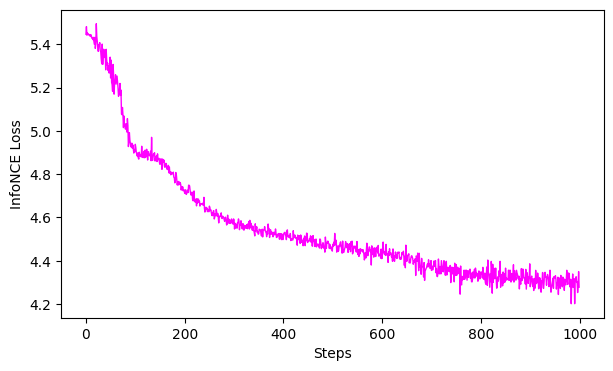

In [ ]:
# drawing the training curve of the CEBRA model
cebra.plot_loss(sample_cebra)

##### **III-1-(d). embedding visualization**

In [ ]:
# extract latent embeddings from the trained model
sample_emb = sample_cebra.transform(sample_eeg)

In [ ]:
# convert embeddings into the dataframe
sample_emb_df = pd.DataFrame(sample_emb, columns = ['dim1', 'dim2', 'dim3'])

# add the valence sequence
sample_emb_df['val'] = sample_val
sample_emb_df['val'] = pd.Categorical(sample_emb_df['val'])

sample_emb_df

,dim1,dim2,dim3,val
0,0.020339,0.819485,0.572739,0
1,-0.001591,0.734971,0.678097,0
2,0.036088,0.746055,0.664906,0
3,0.158560,0.874966,0.457486,0
4,0.254608,0.868512,0.425278,0
...,...,...,...,...
228,0.285716,0.877832,0.384418,0
229,0.387138,0.858316,0.336776,0
230,0.669045,0.713014,-0.209739,0
231,0.464247,-0.171265,-0.868989,0


In [ ]:
# visualize the 3D interactive embedding spaces
fig = px.scatter_3d(
    sample_emb_df,
    x = 'dim1',
    y = 'dim2',
    z = 'dim3',
    color = 'val',
    color_discrete_map = color_map,
    title = "sub-01's valence map in the brain" ,
    labels = {'dim1': 'Dim 1', 'dim2': 'Dim 2', 'dim3': 'Dim 3'}
)

# print the plot
fig.show()

#### **III-2. Iterative CEBRA fitting**

##### **III-2-(1). CEBRA model fitting**

In [ ]:
for sub in sub_list:
  # iterative data loading
  tmp_df = pd.read_csv(f"./dataset/{sub}_SP-STFT-input.csv")

  # disentangle EEG and valence from the loaded csv data
  tmp_eeg = tmp_df.iloc[:, :-1].to_numpy()
  tmp_val = tmp_df.iloc[:, -1].to_numpy()

  # load the CEBRA model
  tmp_cebra = cebra.CEBRA.load(f"./models/{sub}_cebra-model.pt")

  # fit the model
  tmp_cebra.fit(tmp_eeg, tmp_val)

  # extract the embedding from the trained model and save it
  tmp_emb = tmp_cebra.transform(tmp_eeg)
  tmp_emb_df = pd.DataFrame(tmp_emb, columns = ['dim1', 'dim2', 'dim3'])
  tmp_emb_df['val'] = tmp_val
  tmp_emb_df['val'] = pd.Categorical(tmp_emb_df['val'])

  # archive the model and embeddings
  tmp_cebra.save(f'./models/{sub}_cebra-model.pt')
  tmp_emb_df.to_csv(f'./embeddings/{sub}_emb.csv', index = False, encoding = 'utf-8-sig')

  print(f"CEBRA fitting for {sub} is done!")
  print("\n")

pos: -2.7653 neg:  7.0944 total:  4.3291 temperature:  0.3577: 100%|██████████| 1000/1000 [00:12<00:00, 80.68it/s]


CEBRA fitting for sub-01 is done!




pos: -2.6901 neg:  7.1278 total:  4.4376 temperature:  0.3648: 100%|██████████| 1000/1000 [00:12<00:00, 83.23it/s]


CEBRA fitting for sub-02 is done!




pos: -2.8211 neg:  7.0247 total:  4.2036 temperature:  0.3470: 100%|██████████| 1000/1000 [00:11<00:00, 84.45it/s]


CEBRA fitting for sub-03 is done!




pos: -2.7519 neg:  7.0347 total:  4.2828 temperature:  0.3625: 100%|██████████| 1000/1000 [00:12<00:00, 82.96it/s]


CEBRA fitting for sub-04 is done!




pos: -3.0921 neg:  7.4423 total:  4.3501 temperature:  0.3217: 100%|██████████| 1000/1000 [00:13<00:00, 76.26it/s]


CEBRA fitting for sub-05 is done!




pos: -2.7017 neg:  6.9854 total:  4.2837 temperature:  0.3619: 100%|██████████| 1000/1000 [00:12<00:00, 78.06it/s]


CEBRA fitting for sub-06 is done!




##### **III-2-(2). embedding visualization**

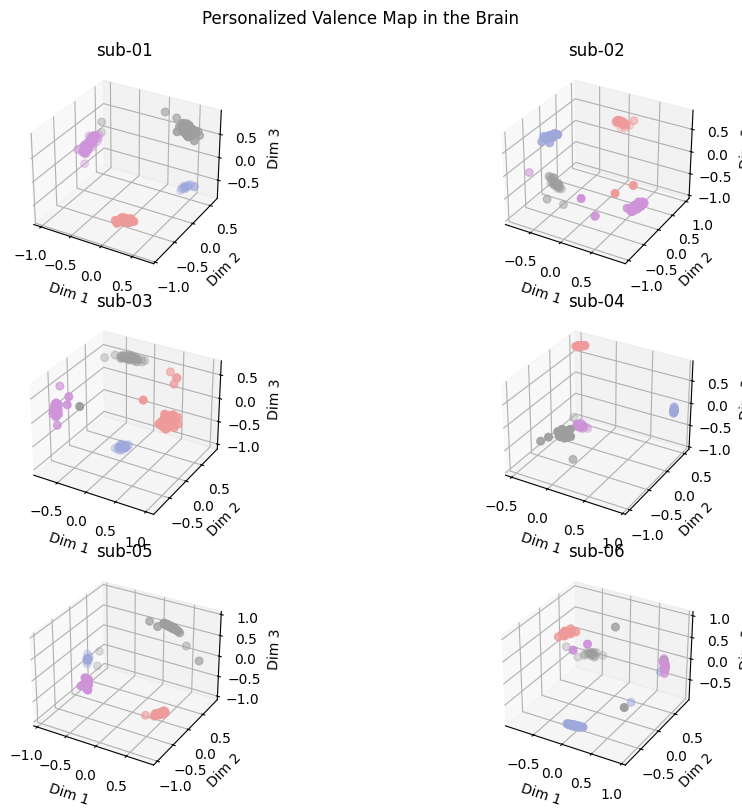

In [ ]:
# set the 3*2 subplot template
fig, axs = plt.subplots(3, 2, figsize = (12, 8), subplot_kw = {'projection': '3d'})

for i, sub_id in enumerate(sub_list):
    # iterative data loading
    tmp_df = pd.read_csv(f"./embeddings/{sub_id}_emb.csv")

    # specify the axis with the latent dimensions
    x = tmp_df.iloc[:, 0]
    y = tmp_df.iloc[:, 1]
    z = tmp_df.iloc[:, 2]

    # color the data points
    color = tmp_df.iloc[:, -1].map(color_map)

    # add the scatter plot
    row = i // 2
    col = i % 2

    axs[row, col].scatter(x, y, z, c = color, s = 30, marker = 'o')
    axs[row, col].set_title(f'{sub_id}')
    axs[row, col].set_xlabel('Dim 1')
    axs[row, col].set_ylabel('Dim 2')
    axs[row, col].set_zlabel('Dim 3')

# print the plot
plt.suptitle("Personalized Valence Map in the Brain", fontsize = 12)
plt.tight_layout()
plt.show()

#### **III-3. Decoding analysis**

##### **III-3-(1). Overview of CCA-based neural alignment**

In [ ]:
# load the example data
sub_01_emb = pd.read_csv('./embeddings/sub-01_emb.csv')
sub_03_emb = pd.read_csv('./embeddings/sub-03_emb.csv')

# extract the 3D embeddings
X = sub_01_emb.iloc[:, :3]
Y = sub_03_emb.iloc[:, :3]

# define and fit a CCA model
cca = CCA(n_components = 3)
cca.fit(X, Y)

# extract the aligned embeddings
sub_01_emb_c, sub_03_emb_c = cca.transform(X, Y)

# load the valence sequence labels
labels_sub_01 = sub_01_emb.iloc[:, -1]
labels_sub_03 = sub_03_emb.iloc[:, -1]

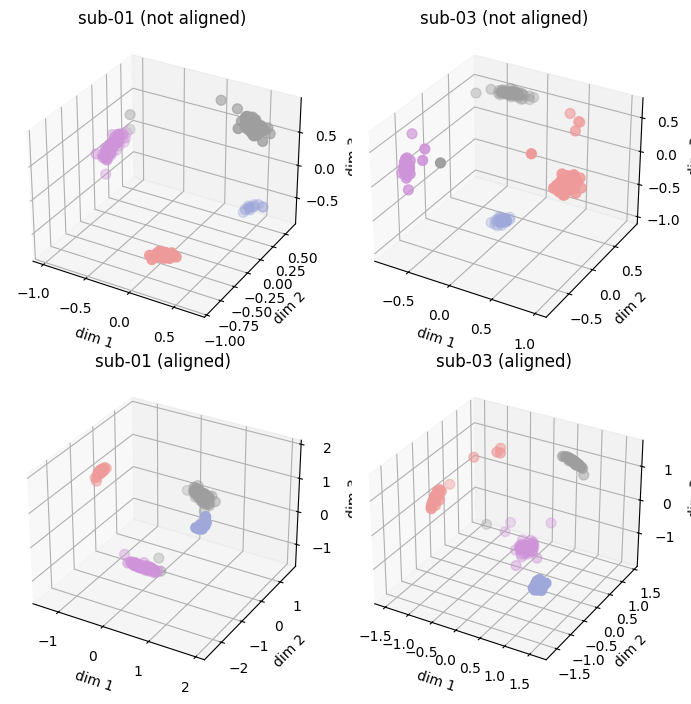

In [ ]:
# set the 2*2 subplot template
fig = plt.figure(figsize = (7, 7))

ax1 = fig.add_subplot(221, projection = '3d')
ax2 = fig.add_subplot(222, projection = '3d')
ax3 = fig.add_subplot(223, projection = '3d')
ax4 = fig.add_subplot(224, projection = '3d')

# (1, 1) subplot: not-aligned sub-01's embeddings
sc1 = ax1.scatter(
    X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2],
    c = labels_sub_01.map(color_map), s = 50)
ax1.set_title("sub-01 (not aligned)")
ax1.set_xlabel('dim 1')
ax1.set_ylabel('dim 2')
ax1.set_zlabel('dim 3')

# (1, 2) subplot: not-aligned sub-03's embeddings
sc2 = ax2.scatter(
    Y.iloc[:, 0], Y.iloc[:, 1], Y.iloc[:, 2],
    c = labels_sub_03.map(color_map), s = 50)
ax2.set_title('sub-03 (not aligned)')
ax2.set_xlabel('dim 1')
ax2.set_ylabel('dim 2')
ax2.set_zlabel('dim 3')

# (2, 1) subplot: aligned sub-01's embeddings
sc3 = ax3.scatter(
    sub_01_emb_c[:, 0], sub_01_emb_c[:, 1], sub_01_emb_c[:, 2],
    c = labels_sub_01.map(color_map), s = 50)
ax3.set_title("sub-01 (aligned)")
ax3.set_xlabel('dim 1')
ax3.set_ylabel('dim 2')
ax3.set_zlabel('dim 3')

# (2, 2) subplot: aligned sub-03's embeddings
sc4 = ax4.scatter(
    sub_03_emb_c[:, 0], sub_03_emb_c[:, 1], sub_03_emb_c[:, 2],
    c = labels_sub_03.map(color_map), s = 50)
ax4.set_title("sub-03 (aligned)")
ax4.set_xlabel('dim 1')
ax4.set_ylabel('dim 2')
ax4.set_zlabel('dim 3')

plt.tight_layout()
plt.show()

##### **III-3-(2). Pairwise Decoding with Alignment**

In [ ]:
# create an empty dataframe to archive results
results_df = pd.DataFrame(columns = ['train_sub', 'test_sub', 'test_wF1', 'condition'])
test_idx = 0

for train_sub in sub_list:
  for test_sub in sub_list:
    if train_sub != test_sub:

      # update the pair index
      test_idx += 1

      # iterative data loading
      train_df = pd.read_csv(f"./embeddings/{train_sub}_emb.csv")
      test_df = pd.read_csv(f"./embeddings/{test_sub}_emb.csv")

      # CCA-based embedding alignment
      train_emb = train_df.iloc[:, :3]
      test_emb = test_df.iloc[:, :3]
      cca = CCA(n_components = 3)
      cca.fit(train_emb, test_emb)
      train_emb_c, test_emb_c = cca.transform(train_emb, test_emb)

      # aligned CEBRA (AC) decoding analysis
      ac_knn_decoder = KNeighborsClassifier(n_neighbors = 15, metric = 'cosine')             # k = the nearest odd of input size
      ac_knn_decoder.fit(train_emb_c, train_df.iloc[:, -1])                                  # training the decoder

      ac_test_val_pred = ac_knn_decoder.predict(test_emb_c)                                  # predict test embeddings' label
      ac_test_wF1 = f1_score(test_df.iloc[:, -1], ac_test_val_pred, average = 'weighted')    # assess test weighted F1 score

      ac_add_row = pd.DataFrame([[train_sub, test_sub, ac_test_wF1, 'AC', str(test_idx)]],
                                   columns = ['train_sub', 'test_sub', 'test_wF1', 'condition', 'index'])
      results_df = pd.concat([results_df, ac_add_row])                                       # archive the results

      # not-aligned CEBRA (NC) decoding analysis
      nc_knn_decoder = KNeighborsClassifier(n_neighbors = 15, metric = 'cosine')             # k = the nearest odd of input size
      nc_knn_decoder.fit(train_emb, train_df.iloc[:, -1])                                    # training the decoder

      nc_test_val_pred = ac_knn_decoder.predict(test_emb)                                    # predict test embeddings' label
      nc_test_wF1 = f1_score(test_df.iloc[:, -1], nc_test_val_pred, average = 'weighted')    # assess test weighted F1 score

      nc_add_row = pd.DataFrame([[train_sub, test_sub, nc_test_wF1, 'NC', str(test_idx)]],
                                   columns = ['train_sub', 'test_sub', 'test_wF1', 'condition', 'index'])
      results_df = pd.concat([results_df, nc_add_row])                                       # archive the results

      print(f"[{test_idx}] (train) {train_sub} / (test) {test_sub} | AC/NC decoding analyses were done!")

<ipython-input-37-9a0012121b86>:32: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/

[1] (train) sub-01 / (test) sub-02 | AC/NC decoding analyses were done!
[2] (train) sub-01 / (test) sub-03 | AC/NC decoding analyses were done!
[3] (train) sub-01 / (test) sub-04 | AC/NC decoding analyses were done!
[4] (train) sub-01 / (test) sub-05 | AC/NC decoding analyses were done!
[5] (train) sub-01 / (test) sub-06 | AC/NC decoding analyses were done!
[6] (train) sub-02 / (test) sub-01 | AC/NC decoding analyses were done!
[7] (train) sub-02 / (test) sub-03 | AC/NC decoding analyses were done!
[8] (train) sub-02 / (test) sub-04 | AC/NC decoding analyses were done!
[9] (train) sub-02 / (test) sub-05 | AC/NC decoding analyses were done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



[10] (train) sub-02 / (test) sub-06 | AC/NC decoding analyses were done!
[11] (train) sub-03 / (test) sub-01 | AC/NC decoding analyses were done!
[12] (train) sub-03 / (test) sub-02 | AC/NC decoding analyses were done!
[13] (train) sub-03 / (test) sub-04 | AC/NC decoding analyses were done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



[14] (train) sub-03 / (test) sub-05 | AC/NC decoding analyses were done!
[15] (train) sub-03 / (test) sub-06 | AC/NC decoding analyses were done!
[16] (train) sub-04 / (test) sub-01 | AC/NC decoding analyses were done!
[17] (train) sub-04 / (test) sub-02 | AC/NC decoding analyses were done!
[18] (train) sub-04 / (test) sub-03 | AC/NC decoding analyses were done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



[19] (train) sub-04 / (test) sub-05 | AC/NC decoding analyses were done!
[20] (train) sub-04 / (test) sub-06 | AC/NC decoding analyses were done!
[21] (train) sub-05 / (test) sub-01 | AC/NC decoding analyses were done!
[22] (train) sub-05 / (test) sub-02 | AC/NC decoding analyses were done!
[23] (train) sub-05 / (test) sub-03 | AC/NC decoding analyses were done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



[24] (train) sub-05 / (test) sub-04 | AC/NC decoding analyses were done!
[25] (train) sub-05 / (test) sub-06 | AC/NC decoding analyses were done!
[26] (train) sub-06 / (test) sub-01 | AC/NC decoding analyses were done!
[27] (train) sub-06 / (test) sub-02 | AC/NC decoding analyses were done!
[28] (train) sub-06 / (test) sub-03 | AC/NC decoding analyses were done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



[29] (train) sub-06 / (test) sub-04 | AC/NC decoding analyses were done!
[30] (train) sub-06 / (test) sub-05 | AC/NC decoding analyses were done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [ ]:
results_df

,train_sub,test_sub,test_wF1,condition,index
0,sub-01,sub-02,0.134114,AC,1
0,sub-01,sub-02,0.139792,NC,1
0,sub-01,sub-03,0.974176,AC,2
0,sub-01,sub-03,0.243255,NC,2
0,sub-01,sub-04,0.437955,AC,3
0,sub-01,sub-04,0.257611,NC,3
0,sub-01,sub-05,0.264826,AC,4
0,sub-01,sub-05,0.659999,NC,4
0,sub-01,sub-06,0.532992,AC,5
0,sub-01,sub-06,0.413705,NC,5


Paired t-test: t-statistic = 4.118, p-value = 2.899e-04, Cohen's d = 1.059


<ipython-input-43-fea62f87cedb>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




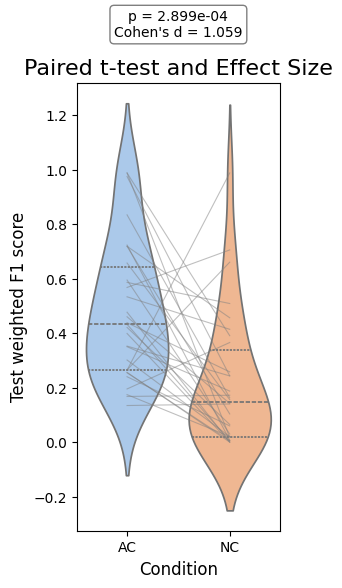

In [ ]:
# pivotize results_df for paired t-test
pivot_df = results_df.pivot(index = "index", columns = "condition", values = "test_wF1")

# conduct paired t-test
stat, p_value = ttest_rel(pivot_df["AC"], pivot_df["NC"])
cohens_d = compute_effsize(pivot_df["AC"], pivot_df["NC"], paired = True)

# print the statistics
print(f"Paired t-test: t-statistic = {stat:.3f}, p-value = {p_value:.3e}, Cohen's d = {cohens_d:.3f}")

# set the figure template
plt.figure(figsize = (3, 6))
sns.violinplot(data = results_df, x = "condition", y = "test_wF1", inner = "quartile", palette = "pastel")

# pair the data points with the same index
for subject in pivot_df.index:
    plt.plot([0, 1], [pivot_df.loc[subject, "AC"], pivot_df.loc[subject, "NC"]], c = "gray", alpha = 0.5, linewidth = 0.8)

# add p-value and cohen's d
plt.text(
    0.5,
    max(results_df["test_wF1"]) + 0.5,
    f"p = {p_value:.3e}\nCohen's d = {cohens_d:.3f}",
    ha = "center",
    fontsize = 10,
    bbox = dict(boxstyle = "round", facecolor = "white", alpha = 0.5),
)

# print the figure
plt.title("Paired t-test and Effect Size", fontsize = 16)
plt.xlabel("Condition", fontsize = 12)
plt.ylabel("Test weighted F1 score", fontsize = 12)
plt.tight_layout()
plt.show()